# With fake data

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import aipy, uvtools
#from hera_sim import foregrounds, noise, sigchain, rfi
import h5py
import hera_cal
from collections import OrderedDict
import omnical
import time
from hera_cal.utils import AntennaArray
import cPickle as cp
import linsolve

In [2]:
Nants = 37

ants = np.loadtxt('antenna_positions_%d.dat'%Nants)
idxs = np.arange(Nants)
antpos = {}
for k,v in zip(idxs,ants):
    antpos[k] = v
    
redbls = hera_cal.redcal.get_pos_reds(antpos)
reds = hera_cal.redcal.get_reds(antpos)
# allbls = [bl for red in redbls for bl in red]
# Malls = len(allbls)

# subbls = [redbls[0],redbls[1],redbls[2]]
# allsubs = [bl for red in subbls for bl in red]
# Msubs = len(allsubs)

In [3]:
fqs = np.linspace(.1,.2,num=1024,endpoint=False)
lsts = np.linspace(0,2*np.pi,100,endpoint=False)

In [ ]:
# hdr = OrderedDict(); vis = OrderedDict(); 
# gains = OrderedDict(); wgts = OrderedDict()

# with h5py.File('fake_vis.hdf5','r') as fp:
#     for key in fp.keys():
#         if (key.rfind('-')>0):
#             a1,a2 = key.split('-')
#             vis[(int(a1),int(a2))] = fp[key][...]
#             wgts[(int(a1),int(a2))] = np.ones([len(lsts),len(fqs)])
#         elif (key.startswith('g')):
#             k = key.lstrip('g')
#             gains[int(k)] = fp[key][...]
#         else: hdr[key] = fp[key][...]

In [4]:
gains = OrderedDict(); gains['x'] = OrderedDict()
vis = OrderedDict(); 
wgts = OrderedDict(); hdr = {}

with h5py.File('fake_vis.hdf5','r') as fp:
    for key in fp.keys():
        if (key.rfind('-') > 0):
            a1, a2 = key.split('-')
            vis[(int(a1),int(a2))] = OrderedDict()
            vis[(int(a1),int(a2))]['xx'] = fp[key][...]
            wgts[(int(a1),int(a2))] = OrderedDict()
            wgts[(int(a1),int(a2))]['xx'] = np.ones([len(lsts),len(fqs)])
        elif (key.startswith('g')):
            k = key.lstrip('g')
            gains['x'][int(k)] = np.repeat([fp[key][...]],100,axis=0)
        else: hdr[key] = fp[key][...]

In [5]:
# Recompute input model visibilities 
# for comparision later
mdlvis = {}
for ant1,ant2 in vis.keys():
    mdlvis[(ant1,ant2)] = vis[(ant1,ant2)]['xx']/(gains['x'][ant1] * gains['x'][ant2].conj())

# Phase wraps in gain

Gains are insensitive to the sky, they are purely antenna instrument and beam specific. If there are phase wraps in the gains, that is due to fake cable delays and fake instrumentation errors.

LEARN TO ASK FOR HELP!

<IPython.core.display.Javascript object>


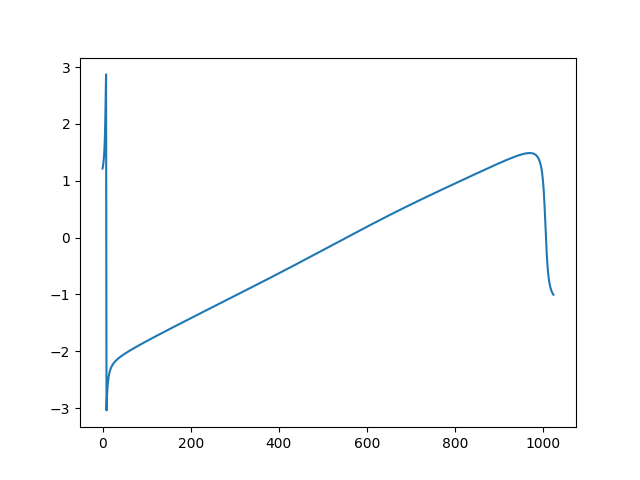

36


In [43]:
plt.figure()
plt.plot(np.angle(gains['x'][20][lst]))
print ant

## Omnical Solutions

Run omnical with all the visibilities generated from all baselines and with visibilities of only the shortest baselines. Compare the two solutions.

Since the computation takes forever to run, I ran omnical and loaded the results into cPickle files.

In [6]:
# All baselines

with open('fake_vis_sols.cp','r') as fp:
    sols = cp.load(fp)

meta, gain_sols, vis_sols = sols

In [7]:
# Only the shortest baselines

with open('fake_vis_sub_sols.cp','r') as fp:
    subset_sols = cp.load(fp)

submeta, subgain_sols, subvis_sols = subset_sols

In [8]:
# Only the shortest baselines with the actual gains 
# as the starting point to logcal.

with open('fake_vis_sub_sols_pegged.cp','r') as fp:
    subset_sols = cp.load(fp)

submeta_old, subgain_sols_old, subvis_sols_old = subset_sols

# Noise in estimated parameters

$$\text{RMS Noise} \propto \frac{1}{\sqrt{N}} $$

**Shortest baselines only:**

Considering only the shortest baselines, every antenna is involved in an average of:

$$N = \frac{6\times 3 + 12 \times 4 + 19 \times 6}{37} = \frac{180}{37} = 4.86$$

**All baselines:**

If you use visibilities from all the possible baseline pairs to estimate the gains, the average number of measurements each antenna is involved in:

$$N = \frac{37 \times 36}{2 \times 37} = 18$$

Therefore, the noise in gain estimates from the shortest baselines only are larger by a factor of:

$$ \frac{\text{Noise in params from shortest baselines}}{\text{Noise in params from all baselines}} = \sqrt{\frac{36}{4.86}} = 2.65$$

In [46]:
# Overall noise \propto 1/sqrt(N)
# For the shortest basesline set, the noise is 
# worse by a factor of np.sqrt(Malls/Msubs)
print np.sqrt(37*18/180)

1.7320508075688772


In [3]:
with open('delay_sols.cp','r') as fp:
    delays = cp.load(fp)

KeyError: 0

In [40]:
delays

{24x: matrix([[-1.04748356e-08, -1.04777131e-08, -1.04807523e-08,
          -1.04694311e-08, -1.04806017e-08, -1.04839649e-08,
          -1.04863334e-08, -1.04800927e-08, -1.04795265e-08,
          -1.04763490e-08, -1.04736233e-08, -1.04643309e-08,
          -1.04565941e-08, -1.04760968e-08, -1.04844898e-08,
          -1.04688430e-08, -1.04892917e-08, -1.04943542e-08,
          -1.04754412e-08, -1.04707693e-08, -1.04953231e-08,
          -1.05124056e-08, -1.04741066e-08, -1.04712512e-08,
          -1.04988426e-08, -1.04661489e-08, -1.04645770e-08,
          -1.04713223e-08, -1.04771762e-08, -1.04846615e-08,
          -1.04696411e-08, -1.04630136e-08, -1.04728404e-08,
          -1.04901923e-08, -1.04710586e-08, -1.04694180e-08,
          -1.04585214e-08, -1.04550932e-08, -1.04749242e-08,
          -1.04830904e-08, -1.04235659e-08, -1.04706474e-08,
          -1.04871635e-08, -1.04744237e-08, -1.04824287e-08,
          -1.04782361e-08, -1.04867053e-08, -1.04775822e-08,
          -1.047687

In [ ]:
print np.std(np.arange(10))
print np.std(np.arange(10)+1j*np.arange(10))
print np.sqrt(2*np.std(np.arange(10))**2)

In [32]:
lst = 10
ant = 36

##------- Some stats --------
# print np.std(np.abs(gain_sols['x'][ant][lst][100:900]))
# print np.std(np.abs(subgain_sols['x'][ant][lst][100:900]))
# print np.std(np.abs(gains['x'][ant][lst][100:900]))

print np.std(subgain_sols['x'][ant],axis=0)/np.std(gain_sols['x'][ant],axis=0)

[1.4870669 1.5903441 1.567545  ... 1.3351494 1.3793203 1.4010029]


In [ ]:
plt.figure()
plt.yscale("log", nonposy='clip')
plt.errorbar(np.arange(1024),np.abs(gain_sols['x'][ant][lst]),
             #yerr=np.std(np.abs(gain_sols['x'][ant]),axis=0),
             color='m',label='All baselines',alpha=0.7)
plt.errorbar(np.arange(1024),np.abs(gains['x'][ant][lst]),
             color='b',label='Input',alpha=0.5)
plt.errorbar(np.arange(1024),np.abs(subgain_sols['x'][ant][lst]),
             color='g',label='Shortest baselines',alpha=0.5)
plt.fill_between(np.arange(1024),)
# yer = np.std(np.abs(subgain_sols['x'][ant]),axis=0)
# plt.fill_between(np.arange(1024),np.mean(np.abs(subgain_sols['x'][ant]),axis=0)-yer, 
#                  np.mean(np.abs(subgain_sols['x'][ant][lst]),axis=0)+yer,
#                  color='g',label='Shortest baselines',alpha=0.7)

In [ ]:
plt.figure()
x_min = 50; x_max = 950
#plt.semilogy(np.abs(gains['x'][ant][lst]),'b',label='Input',alpha=0.5)
#std = np.std(np.abs(subgain_sols['x'][ant][lst][x_min:x_max]))
# plt.fill_between(np.arange(x_min,x_max,1),
#                  np.abs(gains['x'][ant][lst][x_min:x_max])+std,
#                  np.abs(gains['x'][ant][lst][x_min:x_max])-std,alpha=0.3)
#plt.semilogy((np.abs(gains['x'][ant][lst])+std),'b',label='Input',alpha=0.5)
#plt.semilogy((np.abs(gains['x'][ant][lst])-std),'b',label='Input',alpha=0.5)
plt.errorbar(fqs,np.log10(np.abs(gain_sols['x'][ant][lst])),
             yerr=0.01,#np.log10(np.std(np.abs(gain_sols['x'][ant]),axis=0)),
             color='m',label='All baselines',alpha=0.7)
#plt.semilogy(np.abs(subgain_sols['x'][ant][lst]),'g',label='Shortest baselines',alpha=0.7)
#plt.semilogy(np.std(np.abs(gain_sols['x'][ant]),axis=0),'m',alpha=0.2)
#plt.semilogy(np.std(np.abs(subgain_sols['x'][ant]),axis=0),'g',alpha=0.2)

<IPython.core.display.Javascript object>


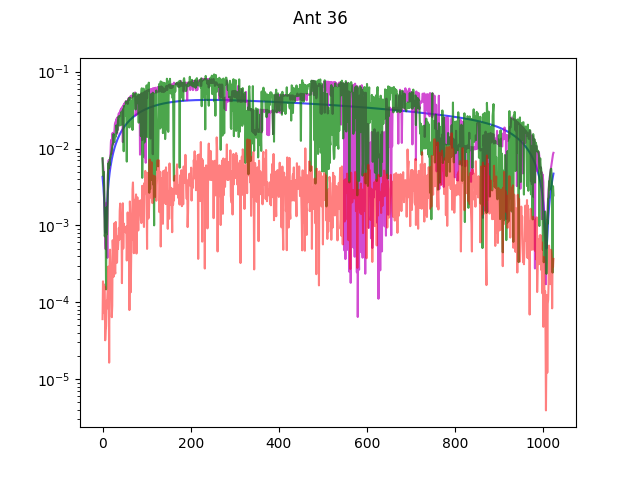

In [44]:
lst = 10

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for ant in range(0,37):
    fig.suptitle('Ant %d'%ant)
    ax.clear()
    ax.semilogy(np.abs(gains['x'][ant][lst]),'b',label='Input',alpha=0.7)
    ax.semilogy(np.abs(gain_sols['x'][ant][lst]-gains['x'][ant][lst]),'m',label='All baselines',alpha=0.7)
    ax.semilogy(np.abs(subgain_sols['x'][ant][lst]-gains['x'][ant][lst]),'g',label='Shortest baselines',alpha=0.7)
    ax.semilogy(np.abs(subgain_sols_old['x'][ant][lst]-gains['x'][ant][lst]),'r',label='Short Pegged',alpha=0.5)
#     ax.plot(np.angle(subgain_sols_old['x'][ant][lst]-gains['x'][ant][lst]),'r',label='Pegged shortest baseline',alpha=0.5)
#     ax.plot(np.angle(gain_sols['x'][ant][lst]-gains['x'][ant][lst]),'m',label='All baselines',alpha=0.7)
#     ax.plot(np.angle(subgain_sols['x'][ant][lst]-gains['x'][ant][lst]),'g',label='Shortest baseline',alpha=0.5)
    #ax.plot(np.angle(gains['x'][ant][lst]),'b',label='Input value',alpha=0.4)
    #ax.set_ylim([1e-4,1e-1])
    time.sleep(1)
    fig.canvas.draw()

# Compare step by step

Logcal seems to be failing to converge to a reasonable starting point in case of uniform priors with only a subset of baselines. Comparing the two sets of baselines step-by-step to see where the divergence begins.

In [11]:
def create_aa(antpos,fqs):
    nants = len(antpos.keys())
    location = (-0.5362, 0.37399, 1051.6900)

    # get antenna positions from file

    # make antpos_ideal array
    antpos_ideal = np.zeros(shape=(nants, 3), dtype=float) - 1

    # unpack from dict -> numpy array
    for k in antpos.keys():
        antpos_ideal[k, :] = np.array([antpos[k][0], antpos[k][1], antpos[k][2]])

    # Make list of antennas.
    # These are values for a zenith-pointing antenna, with a dummy Gaussian beam.
    antennas = []
    for i in range(nants):
        beam = aipy.fit.Beam(fqs)
        phsoff = {'x': [0., 0.], 'y': [0., 0.]}
        amp = 1.
        amp = {'x': amp, 'y': amp}
        bp_r = [1.]
        bp_r = {'x': bp_r, 'y': bp_r}
        bp_i = [0., 0., 0.]
        bp_i = {'x': bp_i, 'y': bp_i}
        twist = 0.
        antennas.append(aipy.pol.Antenna(0., 0., 0., beam, phsoff=phsoff,
                                         amp=amp, bp_r=bp_r, bp_i=bp_i, pointing=(0., np.pi / 2, twist)))

    # Make the AntennaArray and set position parameters
    aa = AntennaArray(location, antennas, antpos_ideal=antpos_ideal)

    pos_prms = {}
    for k,v in antpos.items():
        pos_prms[str(k)] = {'x':v[0], 'y':v[1], 'z':v[2]}
    aa.set_params(pos_prms)
    return aa

In [12]:
aa = create_aa(antpos,fqs)

# Flat gain priors to run omnical
g0 = OrderedDict(); g0['x'] = OrderedDict()
for pair in gains['x'].keys():
    g0['x'][pair] = np.ones([len(lsts), len(fqs)])

# Extract shortest baseline visibilities
subbls = [redbls[0], redbls[1], redbls[2]]
subbls_list = [bl for reds in subbls for bl in reds]
subvis = OrderedDict();
for reds in subbls:
    for bl in reds:
        subvis[bl] = vis[bl]

In [20]:
info_all = hera_cal.omni.aa_to_info(aa, pols=['x'])
m1_all, g1_all, v1_all = omnical.calib.logcal(vis, info_all, xtalk=None, gains=g0, maxiter=50, 
                                              conv=1e-3, stepsize=.3, trust_period=1)

In [21]:
info = hera_cal.omni.aa_to_info(aa, pols=['x'],bls=subbls_list)
m1, g1, v1 = omnical.calib.logcal(subvis, info, xtalk=None, gains=g0, maxiter=500, 
                                  conv=1e-3, stepsize=.03, trust_period=1)

# LogCal by matrix inversion

LogCal in theory computes $(A^{\dagger}A)^{-1}A^{\dagger}Y$ where A is the matrix generated from the configuration of antennas and Y is the given set of measurements.

My hypothesis for the non-convergence of omnical is that the omnical logcal process is iteratively trying to converge on the solution, rather than invert the matrix.

**Note**: Solutions of the matrix inversion method are in linear space (i.e, log of the multiplicative gains) while Logcal and LogSolver return the solutions in multiplicative space. Make sure you compare tomatoes to tomatoes.

$$\text{sol} = \log{g_0} = \log(\eta_0 e^{i\phi}) = \log{\eta_0} + i\phi$$

$$|g_{0}| = e^{\Re(sol)}$$

$$\angle{g_0} = \Im(sol)$$

In [13]:
def genAY(redbls,vis,lst=10):
    # number of parameters = num_ants + num_unique baselines
    N = Nants + len(redbls)
    
    # number of measurements = total number of baselines
    allbls = [bl for red in redbls for bl in red]
    M = len(allbls)
    
    A = np.zeros([M,N],dtype=np.complex)
    Y = np.zeros([M,len(fqs)],dtype=np.complex)
    i = 0
    for bl,reds in enumerate(redbls):
        for pair in reds:
            A[i,pair[0]] = (1+1j)
            A[i,pair[1]] = (1-1j)
            A[i,Nants+bl] = 1+1j
            try: Y[i,:] = vis[pair]['xx'][lst]
            except (KeyError): Y[i,:] = vis[pair[::-1]]['xx'][lst]
            i += 1
    return np.matrix(A), Y

def genY(redbls,vis,lst=10):
    
    #Num measurements
    M = len([bl for red in redbls for bl in red])
    Y = np.zeros([M,len(fqs)],dtype=np.complex)
    i = 0
    for bl,reds in enumerate(redbls):
        for pair in reds:
            try: Y[i,:] = vis[pair]['xx'][lst]
            except (KeyError): Y[i,:] = vis[pair[::-1]]['xx'][lst]
            i += 1
    return Y

A,Y = genAY(subbls,subvis)
M,N = np.shape(A)
print M,N

90 40


In [14]:
Ad = np.transpose(A.conj())
sol_prod1 = np.dot(Ad,A) #Adagger * A
sol_multiplier = np.einsum('mn,nq->mq',np.linalg.pinv(sol_prod1),Ad)

#plt.matshow(np.abs(sol_multiplier))

In [15]:
np.all(np.isclose(Y, genY(subbls,subvis)))

True

In [ ]:
# Convert logsol_mat into a dictionary for lincal
# g_mat = OrderedDict(); g_mat['x'] = OrderedDict()
# for ant in range(37):
#     g_mat['x'][ant] = Y[:37,:]

# vis_mat = OrderedDict(); vis_mat['xx'] = OrderedDict()
# i = 0
# for reds in v1['xx'].keys():
#     vis_mat['xx'][reds] = Y[37+i]
#     i += 1

# subvis_lst = OrderedDict();
# for k in subvis.keys():
#     subvis_lst[k] = OrderedDict()
#     subvis_lst[k]['xx'] = subvis[k]['xx'][lst]

In [16]:
# Solve all lsts
g_mat = OrderedDict(); g_mat['x'] = OrderedDict()
for a in range(37):
    g_mat['x'][a] = np.zeros([len(lsts),len(fqs)],dtype=np.complex)

vis_mat = OrderedDict(); vis_mat['xx'] = OrderedDict()
for reds in [(0,1),(0,5),(0,4)]:
    vis_mat['xx'][reds] = np.zeros([len(lsts),len(fqs)],dtype=np.complex)

for l in range(len(lsts)):
    Y = genY(subbls,subvis,lst=l)
    X = np.einsum('nm,mq->nq',sol_multiplier,Y)
    for a in range(37):
        g_mat['x'][a][l] = X[a]
    for i,reds in enumerate([(0,5),(0,4),(0,1)]):
        vis_mat['xx'][reds][l] = X[37+i]

# Logcal using LogSolver of Linsolve

Another possbility is that Logcal of omnical and LogSolver of linsolve employ different techniques for converging on the right answer. Maybe Logsolver will converge?

In [17]:
#Solve only one lst 
lst = 50

logsol_subvis = {}; i = 0
for reds in subbls:
    for bl in reds:
        logsol_subvis['g%d * g%d_ *V%d'%(bl[0],bl[1],i)] = subvis[bl]['xx'][lst]
    i += 1

In [18]:
logsol = linsolve.LogProductSolver(logsol_subvis)
log_solver_solutions = logsol.solve()

<IPython.core.display.Javascript object>


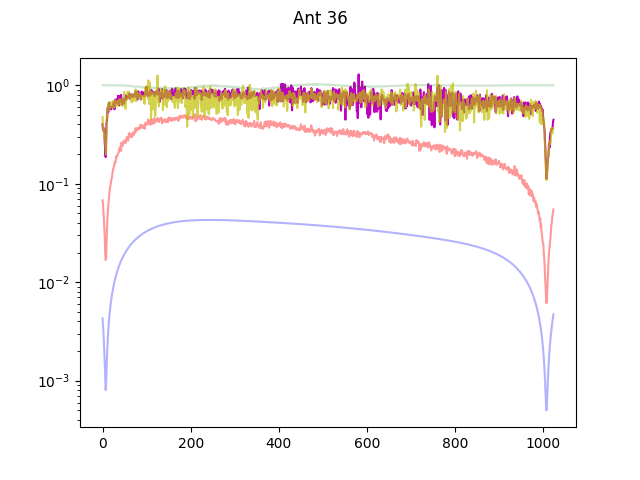

In [45]:
# Compare logcal results

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for ant in range(0,37):
    fig.suptitle('Ant %d'%ant)
    ax.clear()
#    ax.semilogy(np.abs(g1_all['x'][ant][lst]),'r',label='All baselines',alpha=0.4)
    ax.semilogy(np.abs(log_solver_solutions['g%d'%ant]),'m',label='Linsolve',alpha=1)
    ax.semilogy(np.exp(np.real(g_mat['x'][ant][lst])),'g',label='Matrix inversion',alpha=0.2)
    ax.semilogy(np.abs(g1['x'][ant][lst]),'y',label='Omnical',alpha=0.7)
    ax.semilogy(np.abs(gains['x'][ant][lst]),'b',label='Input value',alpha=0.3)
#     ax.plot(np.angle(g1_all['x'][ant][lst]),'r',label='All baselines',alpha=0.5)
#     ax.plot(np.angle(log_solver_solutions['g%d'%ant]),'m',label='Linsolve',alpha=0.2)
#     ax.plot(np.imag(g_mat['x'][ant][lst]),'g',label='Matrix inversion',alpha=0.2)
#     ax.plot(np.angle(g1['x'][ant][lst]),'y',label='Omnical',alpha=0.7)
#     ax.plot(np.angle(gains['x'][ant][lst]),'b',label='Input value',alpha=0.2)
    time.sleep(1)
    fig.canvas.draw()

In [ ]:
# For each antenna, are the nulls in the bandpass matching the phase change 
# for the matrix inversion solutions?
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for ant in range(0,37):
    fig.suptitle('Ant %d'%ant)
    #ax.clear()
    ax.plot(np.mean(np.exp(np.real(g_mat['x'][ant])),axis=0),label='Amplitude',alpha=0.5)
    ax.plot(np.mean(np.imag(g_mat['x'][ant]),axis=0),label='Phase',alpha=0.5)
    time.sleep(1)
    fig.canvas.draw()

In [ ]:
vis_mat['xx'].keys()

In [ ]:
# Compare visibility solutions of the different 
# logcal methods

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i,pair in enumerate([(0,5),(0,4),(0,1)]):
    fig.suptitle(pair)
    ax.clear()
#     # All baselines
#     ax.semilogy(np.abs(v1_all['xx'][pair][lst]),'r',label='All baselines',alpha=0.4)
#     # LinSolve
#     ax.semilogy(np.abs(log_solver_solutions['V%d'%i]),'m',label='Linsolve',alpha=0.7)
#     # Matrix Inversion
#     ax.semilogy(np.exp(np.real(vis_mat['xx'][pair][lst])),'g',label='Matrix Inversion',alpha=0.5)
#     # Logcal 
#     ax.semilogy(np.abs(v1['xx'][pair][lst]),'y',label='Omnical',alpha=0.7)
#     # Input
#     if pair in mdlvis.keys():
#         ax.semilogy(np.abs(mdlvis[pair][lst]),'b',label='Input vis')    
#     elif pair[::-1] in mdlvis.keys():
#         ax.semilogy(np.abs(mdlvis[pair[::-1]][lst]),'b',label='Input vis')
    # Input
    if pair in mdlvis.keys():
        ax.plot(np.angle(mdlvis[pair][lst]),'b',label='Input vis',alpha=0.3)    
    elif pair[::-1] in mdlvis.keys():
        ax.plot(np.angle(mdlvis[pair[::-1]][lst]),'b',label='Input vis',alpha=0.3)
    # All baselines
    ax.plot(np.angle(v1_all['xx'][pair][lst]),'r',label='All baselines',alpha=0.5)
    # LinSolve
    #ax.plot(np.angle(log_solver_solutions['V%d'%i]),'m',label='Linsolve',alpha=0.7)
    # Matrix Inversion
    #ax.plot(np.imag(vis_mat['xx'][pair][lst]),'g',label='Matrix Inversion',alpha=0.5)
    # Logcal 
    ax.plot(np.angle(v1['xx'][pair][lst]),'y',label='Omnical',alpha=0.5)

    time.sleep(1)
    fig.canvas.draw()

In [ ]:
m2_all, g2_all, v2_all = omnical.calib.lincal(vis, info_all, gains=g1_all, vis=v1_all, xtalk=None,
                                              conv=1e-3, stepsize=.3,
                                              trust_period=1, maxiter=50)

In [ ]:
m2_mat, g2_mat, v2_mat = omnical.calib.lincal(subvis, info, gains=g_mat, vis=vis_mat, xtalk=None,
                                              conv=1e-6, stepsize=.3,
                                              trust_period=1, maxiter=50)

In [ ]:
# m2_omni, g2_omni, v2_omni = omnical.calib.lincal(subvis, info, gains=g1, vis=v1, xtalk=None,
#                                                  conv=1e-3, stepsize=.3,
#                                                  trust_period=1, maxiter=500)

with open('fake_vis_sub_sols_smallerstep.cp','r') as fp:
    data = cp.load(fp)
m_omni, g_omni, v_omni = data

In [ ]:
g3_all, v3_all = hera_cal.omni.remove_degen(info_all, g2_all, v2_all, gains, minV=False)

In [ ]:
lst = 10

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for ant in range(0,37):
    fig.suptitle('Ant %d'%ant)
    ax.clear()
    ax.semilogy(np.abs(g3_all['x'][ant][lst]),'g',label='All baselines',alpha=0.5)
    ax.semilogy(np.abs(g_omni['x'][ant][lst]),'r',label='Omnical',alpha=0.5)
    ax.semilogy(np.abs(gains['x'][ant][lst]),'b',label='Input value',alpha=0.3)
#     ax.plot(np.angle(g3_all['x'][ant][lst]),'g',label='All baselines',alpha=0.5)
#     ax.plot(np.angle(g_omni['x'][ant][lst]),'r',label='Omnical',alpha=0.5)
#     #ax.plot(np.angle(g2_mat['x'][ant][lst]),'y',label='Matrix Inversion',alpha=0.5)
#     ax.plot(np.angle(gains['x'][ant][lst]),'b',label='Input value',alpha=0.5)
    time.sleep(1)
    fig.canvas.draw()

In [ ]:
ant = 23
plt.figure()
plt.plot(np.mean(np.abs(gains['x'][ant]),axis=0))
plt.plot(np.mean(np.abs(subgain_sols['x'][ant]),axis=0))

# Compare output and input

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for ant in range(0,37):
    fig.suptitle('Ant %d'%ant)
    ax.clear()
    ax.plot(np.mean(np.abs(subgain_sols['x'][ant]),axis=0),'g',label='Subset of ants',alpha=0.6)
    ax.plot(np.mean(np.abs(gain_sols['x'][ant]),axis=0),'r',label='All ants',alpha=0.7)
    ax.plot(np.mean(np.abs(gains['x'][ant]),axis=0),'b',label='Input value',alpha=0.3)
    ax.set_ylim([0,.06])
    time.sleep(1)
    fig.canvas.draw()

In [ ]:
lst = 25
mean_gain_comp = np.zeros([37,1024],dtype=np.float)
mean_gain_comp_lsts = np.zeros([37,1024],dtype=np.float)

for ant in range(0,37):
    mean_gain_comp_lsts[ant,:] = np.mean(np.abs(subgain_sols['x'][ant]),axis=0) - np.mean(np.abs(gain_sols['x'][ant]),axis=0)
    mean_gain_comp[ant,:] = np.abs(subgain_sols['x'][ant][lst]) - np.abs(gain_sols['x'][ant][lst])

In [ ]:
np.sqrt(np.mean(mean_gain_comp**2,axis=1))

In [ ]:
plt.figure()
plt.imshow(np.abs(mean_gain_comp_lsts),interpolation='nearest',
           extent=[0,1024,0,36],aspect='auto',cmap='viridis')
plt.colorbar(shrink=0.75)

<IPython.core.display.Javascript object>


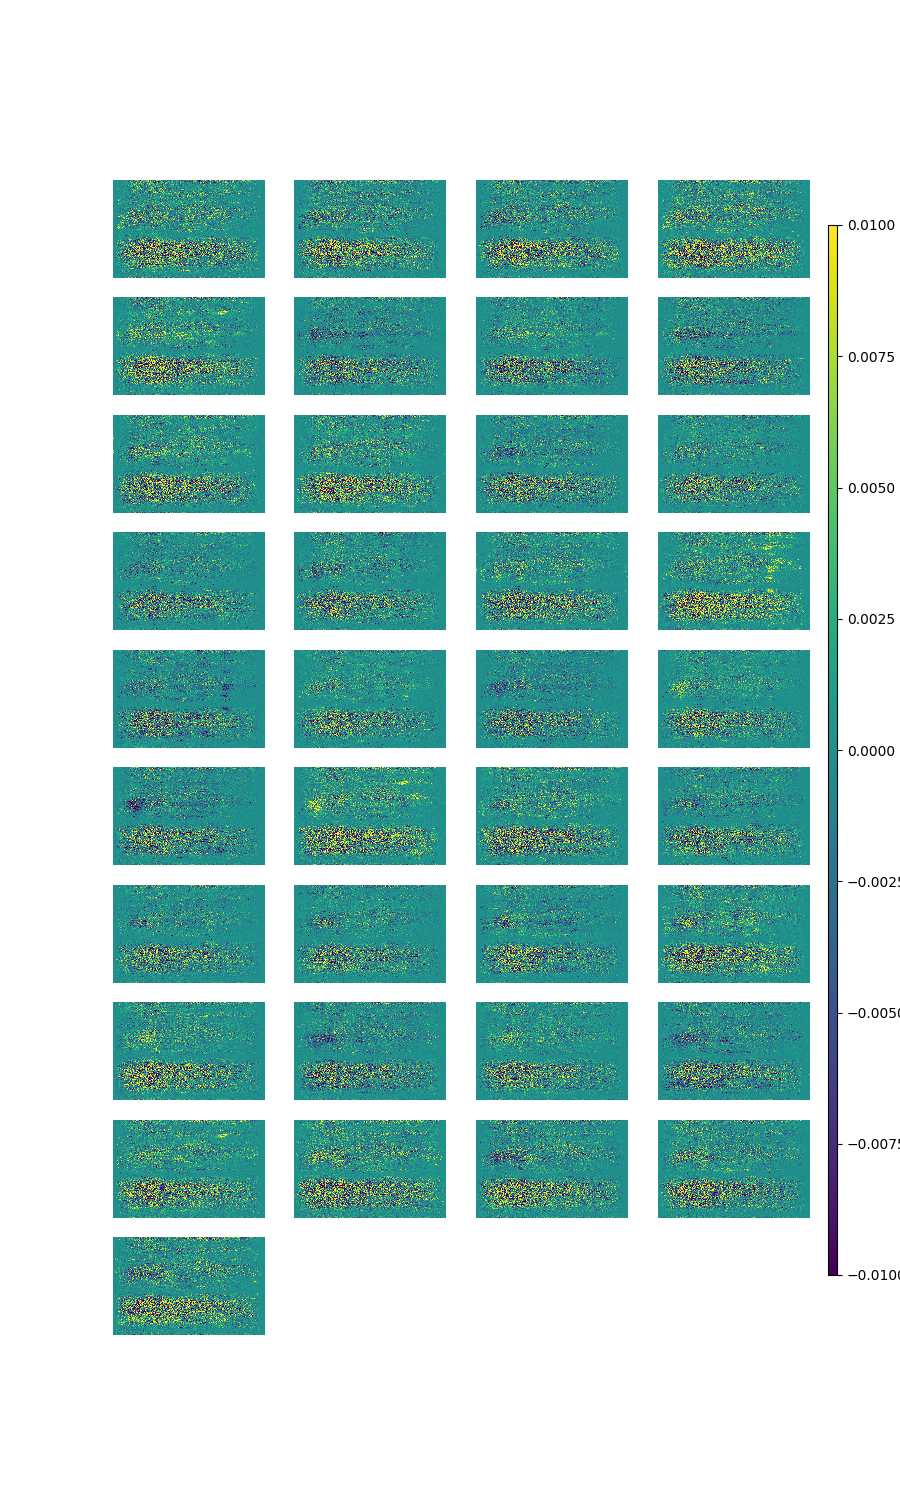

In [26]:
fig = plt.figure(figsize=(9,15))
for ant in range(0,37):
    plt.subplot(10,4,ant+1)
    ax = plt.imshow(np.abs(subgain_sols['x'][ant]) - np.abs(gain_sols['x'][ant]), vmin=-.01, vmax=.01,
                    interpolation='nearest',extent=[0,1024,0,100],aspect='auto',cmap='viridis')
    plt.axis('off')
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
fig.colorbar(ax,cax=cbar_ax)

<IPython.core.display.Javascript object>


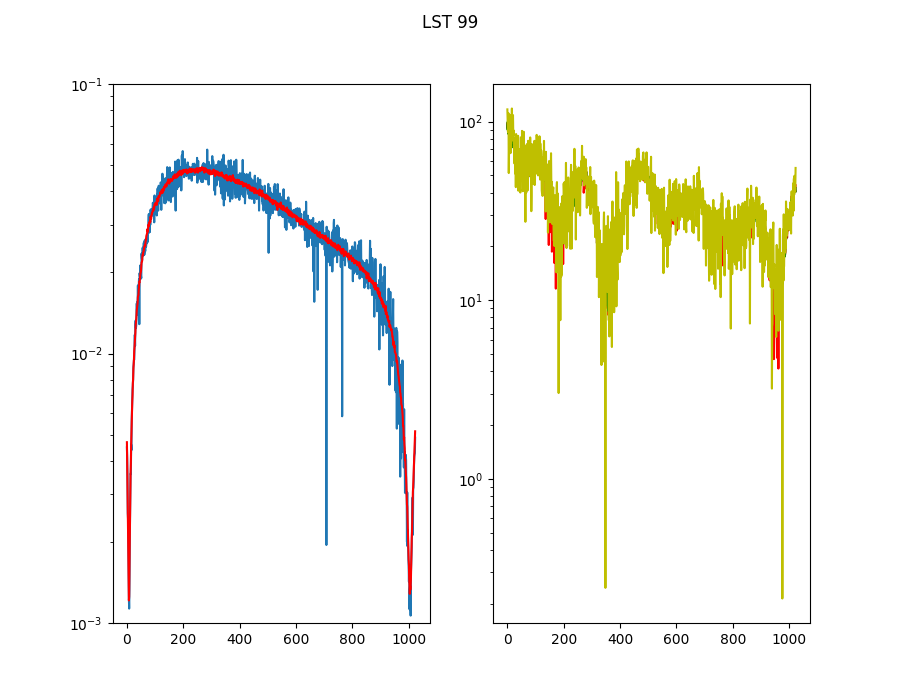

In [27]:
ant = 20

fig = plt.figure(figsize=(9,7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
plt.ion()

fig.show()
fig.canvas.draw()

for lst in range(0,100):
    fig.suptitle('LST %d'%lst)
    ax1.clear(); ax2.clear()
    #ax.semilogy(np.abs(gains[ant]),'b',label='Input value')
    ax1.semilogy(np.abs(subgain_sols['x'][ant][lst]),label='Subset of ants')
    ax1.semilogy(np.abs(gain_sols['x'][ant][lst]),'r',label='All ants')
    ax1.set_ylim([1e-3,1e-1])
    
    ax2.semilogy(np.abs(subvis_sols['xx'][(0,5)][lst]),'r',label='Subset of ants')
    ax2.semilogy(np.abs(vis_sols['xx'][(0,5)][lst]),'g',label='All ants')
    ax2.semilogy(np.abs(mdlvis[(0,5)][lst]),'y',label='Input vis')
    
    time.sleep(1)
    fig.canvas.draw()

In [ ]:
x = np.abs(subgain_sols['x'][23][lst])/np.abs(gain_sols['x'][23][lst])
print np.log10(x).min(), np.log10(x).max()

<IPython.core.display.Javascript object>


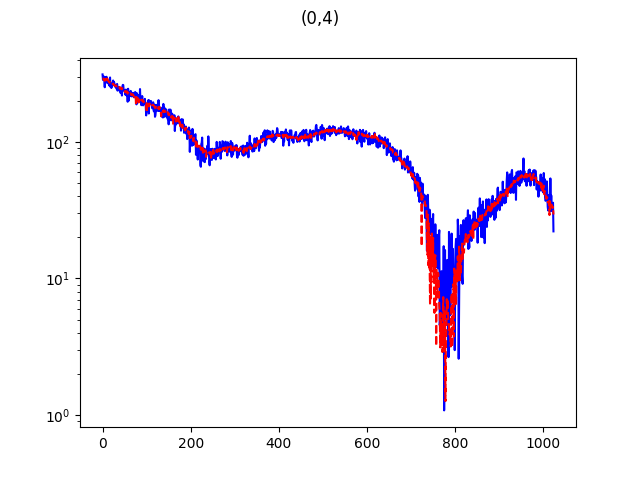

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for a1,a2 in subvis_sols['xx'].keys():
    fig.suptitle('(%d,%d)'%(a1,a2))
    ax.clear()
    
    if (a1,a2) in mdlvis.keys():
        ax.semilogy(np.abs(mdlvis[(a1,a2)][10]),'b')
        #ax.semilogy(np.abs(mdlvis[(a1,a2)][10]-subvis_sols['xx'][(a1,a2)][10]),'y',label='Input vis')    
    elif (a2,a1) in mdlvis.keys():
        ax.semilogy(np.abs(mdlvis[(a2,a1)][10]),'b')
        #ax.semilogy(np.abs(mdlvis[(a2,a1)][10]-subvis_sols['xx'][(a1,a2)][10]),'y',label='Input vis')
    
#     if (a1,a2) in vis_sols['xx'].keys():
#         ax.semilogy(np.abs(vis_sols['xx'][(a1,a2)][10]),'g',label='All ants')
#     else:
#         ax.semilogy(np.abs(vis_sols['xx'][(a2,a1)][10]),'g',label='All ants')
        
    ax.semilogy(np.abs(subvis_sols['xx'][(a1,a2)][10]),'r--',label='Subset of ants')
        
    time.sleep(1)
    fig.canvas.draw()

In [ ]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# plt.ion()

# fig.show()
# fig.canvas.draw()

# for a1,a2 in subvis_sols['xx'].keys():
#     fig.suptitle('(%d,%d)'%(a1,a2))
#     ax.clear()
#     ax.plot(np.angle(subvis_sols['xx'][(a1,a2)][10]),'r--',label='Subset of ants')
#     if (a1,a2) in vis_sols['xx'].keys():
#         ax.plot(np.angle(vis_sols['xx'][(a1,a2)][10]),'g',label='All ants')
#     else:
#         ax.plot(np.angle(vis_sols['xx'][(a2,a1)][10]),'g',label='All ants')
#     if (a1,a2) in mdlvis.keys():
#         ax.plot(np.angle(mdlvis[(a1,a2)][10]),'y',label='Input vis')    
#     elif (a2,a1) in mdlvis.keys():
#         ax.plot(np.semilogy(mdlvis[(a2,a1)][10]),'y',label='Input vis')
#     else: print 'Not there'
        
#     time.sleep(1)
#     fig.canvas.draw() 